# Autoencoders #
## Abstract ##

In this part, I use Autoencoders to generate fake images. And I aslo adjust the size of the latent space and change the network architecture to figure out the best combination of them to generate most realistic images.

In [1]:
import time
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

import keras
from keras.models import Model
from keras.layers import *
from keras import optimizers
from keras import backend as K

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
# mnist data
df_train = pd.read_csv('./data/94_character_TMNIST.csv')
df_test = pd.read_csv('./data/94_character_TMNIST.csv')

#Normalization
X_train = df_train.iloc[:, 2:786]
X_train = X_train.values.astype('float32')/255.
output_X_train = X_train.reshape(-1,28,28,1)

X_test = df_test.iloc[:, 2:786]
X_test = X_test.values.astype('float32')/255.
output_X_test = X_test.reshape(-1,28,28,1)

print(X_train.shape, X_test.shape)

(274093, 784) (274093, 784)


## Latent space and network architecture

I test the fake image generation with latent space = 32 and latent space = 16. After 10 epcho, the lossing with latent space = 32 is lower than the other one. And the images also show that the Autoencoders give the best quality with the latent space = 32.

In [26]:
latent_space_size = 32

In [27]:
#encoder
encoder_inputs = Input(shape = (28,28,1))
 
conv1 = Conv2D(16, (3,3), activation = 'relu', padding = "SAME")(encoder_inputs)
pool1 = MaxPooling2D(pool_size = (2,2), strides = 2)(conv1)
conv2 = Conv2D(32, (3,3), activation = 'relu', padding = "SAME")(pool1)
pool2 = MaxPooling2D(pool_size = (2,2), strides = 2)(conv2)
flat = Flatten()(pool2)
 
encoder_outputs = Dense(latent_space_size, activation = 'relu')(flat)

In [ ]:
#AE decoder
dense_layer_d = Dense(7*7*32, activation = 'relu')(encoder_outputs)
output_from_d = Reshape((7,7,32))(dense_layer_d)
conv1_1 = Conv2D(32, (3,3), activation = 'relu', padding = "SAME")(output_from_d)
upsampling_1 = Conv2DTranspose(32, 3, padding='same', activation='relu', strides=(2, 2))(conv1_1)
upsampling_2 = Conv2DTranspose(16, 3, padding='same', activation='relu', strides=(2, 2))(upsampling_1)
decoded_outputs = Conv2DTranspose(1, 3, padding='same', activation='relu')(upsampling_2)

#AE
autoencoder = Model(encoder_inputs, decoded_outputs)

m = 256
n_epoch = 5
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(output_X_train,output_X_train, epochs=n_epoch, batch_size=m, shuffle=True)

Train on 274093 samples
Epoch 1/5
274093/274093 [==============================] - 432s 2ms/sample - loss: 0.1809
Epoch 2/5
274093/274093 [==============================] - 453s 2ms/sample - loss: 0.1384
Epoch 3/5
274093/274093 [==============================] - 484s 2ms/sample - loss: 0.1332
Epoch 4/5
274093/274093 [==============================] - 433s 2ms/sample - loss: 0.1290
Epoch 5/5
220160/274093 [=======================>......] - ETA: 1:25 - loss: 0.1335

In [18]:
test_imgs = autoencoder.predict(output_X_test)

/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py:2401: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


(274093, 28, 28, 1)


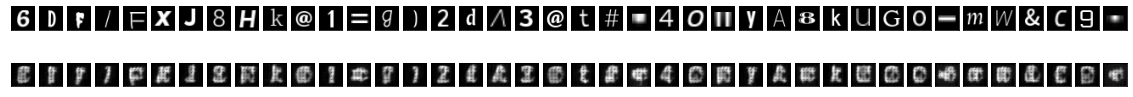

In [23]:
print(test_imgs.shape)
import matplotlib.pyplot as plt

n = 40  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(4, n, i + 1)
    plt.imshow(output_X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(4, n, i + 1 + n)
    plt.imshow(test_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [20]:
latent_space_size = 16

In [21]:
#AE decoder with latent space size 16
dense_layer_d = Dense(7*7*32, activation = 'relu')(encoder_outputs)
output_from_d = Reshape((7,7,32))(dense_layer_d)
conv1_1 = Conv2D(32, (3,3), activation = 'relu', padding = "SAME")(output_from_d)
upsampling_1 = Conv2DTranspose(32, 3, padding='same', activation='relu', strides=(2, 2))(conv1_1)
upsampling_2 = Conv2DTranspose(16, 3, padding='same', activation='relu', strides=(2, 2))(upsampling_1)
decoded_outputs = Conv2DTranspose(1, 3, padding='same', activation='relu')(upsampling_2)

#AE
autoencoder = Model(encoder_inputs, decoded_outputs)

m = 256
n_epoch = 5
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(output_X_train,output_X_train, epochs=n_epoch, batch_size=m, shuffle=True)

Train on 274093 samples
Epoch 1/5
274093/274093 [==============================] - 285s 1ms/sample - loss: 0.1636
Epoch 2/5
274093/274093 [==============================] - 297s 1ms/sample - loss: 0.1440
Epoch 3/5
274093/274093 [==============================] - 343s 1ms/sample - loss: 0.1397
Epoch 4/5
274093/274093 [==============================] - 364s 1ms/sample - loss: 0.1335
Epoch 5/5
274093/274093 [==============================] - 407s 1ms/sample - loss: 0.1231


In [24]:
test_imgs = autoencoder.predict(output_X_test)

/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py:2401: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


(274093, 28, 28, 1)


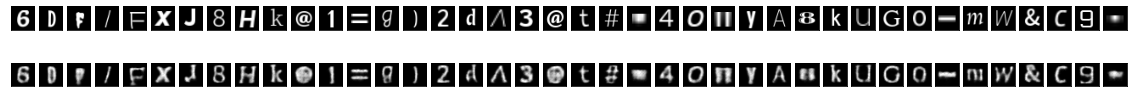

In [25]:
print(test_imgs.shape)
import matplotlib.pyplot as plt

n = 40  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(4, n, i + 1)
    plt.imshow(output_X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(4, n, i + 1 + n)
    plt.imshow(test_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()